# Plot Trained Params for Low c-rate

In [2]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import dfols
import signal
import sys
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from scipy import interpolate
from stopit import threading_timeoutable as timeoutable
# from joblib import Parallel, delayed, parallel_backend

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.style.use('seaborn-white')

eSOH_DIR = "./data/esoh/"
oCV_DIR = "./data/ocv/"
fig_DIR = "./figures/"
res_DIR = "./data/results/"
# %matplotlib widget

In [3]:
blam_p = [2e-2/3600, 4e-6, 1e-5,1e-6]
blam_n = [2e-1/3600, 3e-5, 2e-5,7e-5]
k_sei= [1.6e-16,1.5e-16,1.7e-16,1.3e-16]

In [4]:
for ic in range(0,4):
    print(ic)

0
1
2
3


In [5]:
colors = ['b','r','g','y']

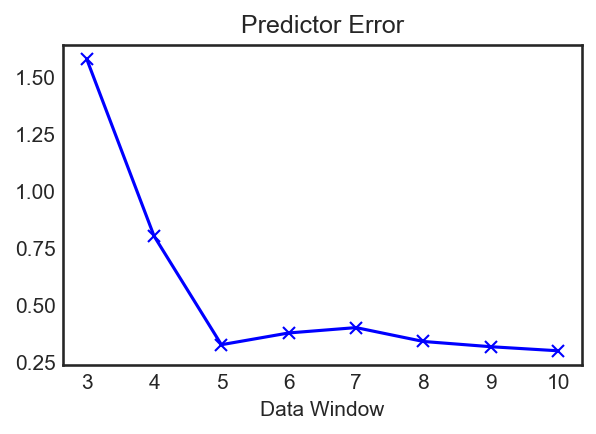

In [15]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
for ic in [1]:
    sim_des = "ic_"+str(ic)
    df_x = pd.read_csv(res_DIR + "fit_train_pred_"+sim_des+".csv").drop(['Unnamed: 0'],axis=1)
    ax.plot(df_x['train_len'],df_x['obj_full'],'bx-')
    ax.set_title('Predictor Error')
    ax.set_xlabel('Data Window')
# fig.legend(["ic = 0","ic = 1","ic = 2","ic = 3"],ncol=4,loc='lower center',bbox_to_anchor=[0.5,-0.05])
fig.tight_layout()    
fig.savefig(fig_DIR +'norm_obj_all_ic'+'.png',bbox_inches='tight')

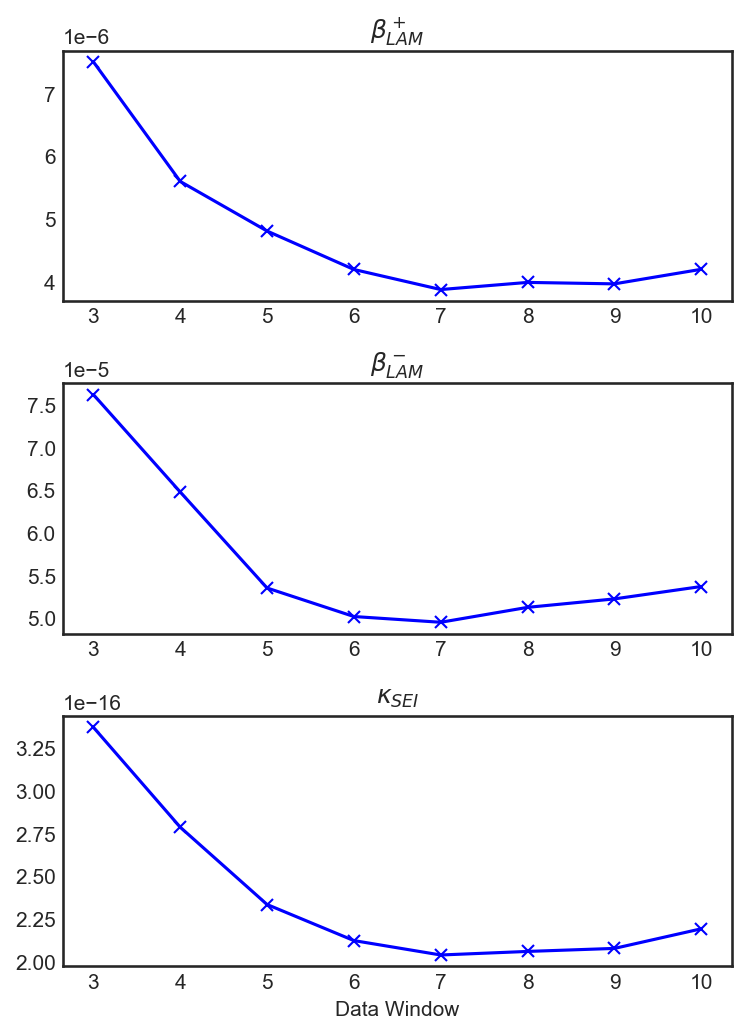

In [16]:
fig, axes = plt.subplots(3,1,figsize=(5,7))
for ic in [1]:
    sim_des = "ic_"+str(ic)
    df_x = pd.read_csv(res_DIR + "fit_train_pred_"+sim_des+".csv").drop(['Unnamed: 0'],axis=1)
    ax1 = axes.flat[0]
    ax1.plot(df_x['train_len'],df_x['x_0']*blam_p[ic],'bx-')
    ax1.set_title(r'$\beta_{LAM}^+$')
    ax2 = axes.flat[1]
    ax2.plot(df_x['train_len'],df_x['x_1']*blam_n[ic],'bx-')
    ax2.set_title(r'$\beta_{LAM}^-$')
    ax3 = axes.flat[2]
    ax3.plot(df_x['train_len'],df_x['x_2']*k_sei[ic],'bx-')
    ax3.set_title(r'$\kappa_{SEI}$')
    ax3.set_xlabel('Data Window')
# fig.legend(["ic = 0","ic = 1","ic = 2","ic = 3"],ncol=4,loc='lower center',bbox_to_anchor=[0.5,-0.05])
fig.tight_layout()    
fig.savefig(fig_DIR +'trained_parameters_all_ic'+'.png',bbox_inches='tight')

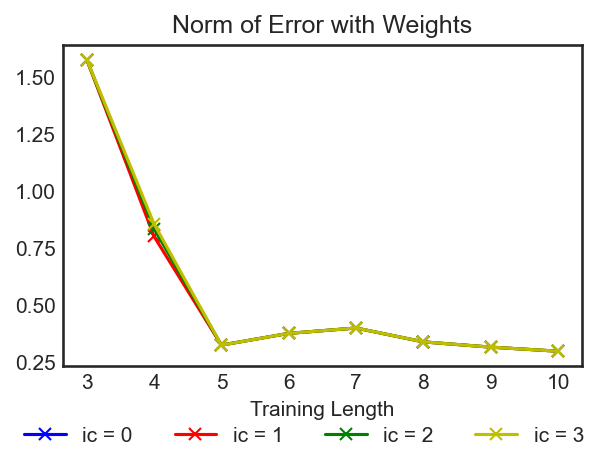

In [7]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
for ic in range(0,4):
    sim_des = "ic_"+str(ic)
    df_x = pd.read_csv(res_DIR + "fit_train_pred_"+sim_des+".csv").drop(['Unnamed: 0'],axis=1)
    ax.plot(df_x['train_len'],df_x['obj_full'],'x-',color=colors[ic])
    ax.set_title('Norm of Error with Weights')
    ax.set_xlabel('Training Length')
fig.legend(["ic = 0","ic = 1","ic = 2","ic = 3"],ncol=4,loc='lower center',bbox_to_anchor=[0.5,-0.05])
fig.tight_layout()    
fig.savefig(fig_DIR +'norm_obj_all_ic'+'.png',bbox_inches='tight')